In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import re

### ***Missing data - rows***

Taking a look at the volunteer dataset again, we want to drop rows where the `category_desc` column values are missing. We're going to do this using boolean indexing, by checking to see if we have any null values, and then filtering the dataset so that we only have rows with those values.

* Check how many values are missing in the `category_desc` column using `isnull()` and `sum()`.

* Subset the `volunteer` dataset by indexing by where `category_desc` is `notnull()`, and store in a new variable called `volunteer_subset`.

* Take a look at the `.shape` attribute of the new dataset, to verify it worked correctly.

In [3]:
volunteer = pd.read_csv('volunteer_opportunities.csv')

# Check how many values are missing in the category_desc column
print(volunteer['category_desc'].isnull().sum())

# Subset the volunteer dataset
volunteer_subset = volunteer[volunteer['category_desc'].notnull()]

# Print out the shape of the subset
print(volunteer_subset.shape)

48
(617, 35)


### ***Missing data - columns***

We have a dataset comprised of volunteer information from New York City. The dataset has a number of features, but we want to get rid of features that have at least 3 missing values.

How many features are in the original dataset, and how many features are in the set after columns with at least 3 missing values are removed?

The dataset `volunteer` has been provided.
Use the **`dropna()`** function to remove columns.
You'll have to set both the **`axis=`** and **`thresh=`** parameters.

In [5]:
print(volunteer.shape[1], volunteer.dropna(axis=1, thresh=3).shape[1])

35 24


### ***Converting a column type***

If you take a look at the volunteer dataset types, you'll see that the column hits is type `object`. But, if you actually look at the column, you'll see that it consists of integers. Let's convert that column to type `int`.

* Use the **`.astype`** function to convert the column to type `int`.
* Take a look at the `dtypes` of the dataset again, and notice that the column type has changed.

In [7]:
volunteer["hits"] = volunteer["hits"].astype(str)

# Print the head of the hits column
print(volunteer["hits"].head())
print(volunteer["hits"].dtype)
# Convert the hits column to type int
volunteer["hits"] = volunteer["hits"].astype(int)

# Look at the dtypes of the dataset
print(volunteer["hits"].dtype)

0    737
1     22
2     62
3     14
4     31
Name: hits, dtype: object
object
int64


# ***Class imbalance***

In the volunteer dataset, we're thinking about trying to predict the `category_desc` variable using the other features in the dataset. First, though, we need to know what the class distribution (and imbalance) is for that label.

Which descriptions occur less than `50` times in the volunteer dataset?

The dataset volunteer has been provided.
The column you want to check is `category_desc`.
Use the **`.value_counts()`** method to check variable counts.

In [9]:
volunteer['category_desc'].value_counts()  

Strengthening Communities    307
Helping Neighbors in Need    119
Education                     92
Health                        52
Environment                   32
Emergency Preparedness        15
Name: category_desc, dtype: int64

Both Emergency Prepardness and Environment occur less than 50 times.

### ***Stratified sampling***

We know that the distribution of variables in the `category_desc` column in the volunteer dataset is uneven. If we wanted to train a model to try to predict `category_desc`, we would want to train the model on a sample of data that is representative of the entire dataset. Stratified sampling is a way to achieve this.

* Create a `volunteer_X` dataset with all of the columns except `category_desc`.
* Create a `volunteer_y` training labels dataset.
* Split up the `volunteer_X` dataset using scikit-learn's **`train_test_split`** function and passing volunteer_y into the **`stratify=`** parameter.
* Take a look at the `category_desc` value counts on the training labels.

In [10]:
# Create a data with all columns except category_desc
volunteer_X = volunteer.drop('category_desc', axis=1)

# Create a category_desc labels dataset
volunteer_y = volunteer[['category_desc']]

# Use stratified sampling to split up the dataset according to the volunteer_y dataset
X_train, X_test, y_train, y_test = train_test_split(volunteer_X, volunteer_y, stratify=volunteer_y)

# Print out the category_desc counts on the training y labels
print(y_train['category_desc'].value_counts())

ValueError: ignored

สงสัย scikit-learn version 0.19.1 มันให้ผ่าน

### ***Log normalization in Python***

Proline column in `wine` dataset has a large amount of variance. Let's log normalize it.

Numpy has been imported as `np` in your workspace.

* Print out the variance of the Proline column for reference.
* Use the **`np.log()`** function on the Proline column to create a new, log-normalized column named `Proline_log`.
* Print out the variance of the `Proline_log` column to see the difference.

In [16]:
wine = pd.read_csv('wine_types.csv')

# Print out the variance of the Proline column
print(wine['Proline'].var())

# Apply the log normalization function to the Proline column
wine['Proline_log'] = np.log(wine['Proline'])

# Check the variance of the normalized Proline column
print(wine['Proline_log'].var())

99166.71735542428
0.17231366191842018


# ***How to scale data***

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

### ***Scaling data - standardizing columns***

`Ash`, `Alcalinity of ash`, and `Magnesium` columns in the `wine` dataset are all on different scales, let's standardize them in a way that allows for use in a linear model.

* Import **`StandardScaler`** from **`sklearn.preprocessing`**.

* Create the **`StandardScaler()`** method and store in a variable named `ss`.

* Create a subset of the `wine` DataFrame of the `Ash`, `Alcalinity of ash`, and `Magnesium` columns, store in a variable named `wine_subset`.

* Apply the **`ss.fit_transform`** method to the `wine_subset` DataFrame.

In [18]:
# Import StandardScaler from scikit-learn
from sklearn.preprocessing import StandardScaler

# Create the scaler
ss = StandardScaler()

# Take a subset of the DataFrame you want to scale 
wine_subset = wine[['Ash', 'Alcalinity of ash', 'Magnesium']]

# Apply the scaler to the DataFrame subset
wine_subset_scaled = ss.fit_transform(wine_subset)

In scikit-learn, running **`fit_transform`** during preprocessing will both fit the method to the data as well as transform the data in a single step.

### ***KNN on non-scaled data***

Let's first take a look at the accuracy of a K-nearest neighbors model on the `wine` dataset without standardizing the data. The `knn` model as well as the `X` and `y` data and labels sets have been created already. Most of this process of creating models in scikit-learn should look familiar to you.

* Split the dataset into training and test sets using **`train_test_split()`**.

* Use the `knn` model's **`fit()`** method on the `X_train` data and `y_train` labels, to fit the model to the data.

* Print out the knn model's **`score()`** on the `X_test` data and `y_test` labels to evaluate the model.

In [22]:
wine = pd.read_csv('wine_types.csv')
X = wine.drop(columns='Type')
y = wine['Type']

knn = KNeighborsClassifier()

# Split the dataset and labels into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Fit the k-nearest neighbors model to the training data
knn.fit(X_train, y_train)

# Score the model on the test data
print(knn.score(X_test, y_test))

0.6666666666666666


### ***KNN on scaled data***

The accuracy score on the unscaled `wine` dataset was decent, but we can likely do better if we scale the dataset. The process is mostly the same as the previous exercise, with the added step of scaling the data. Once again, the `knn` model as well as the `X` and `y` data and labels set have already been created for you.

* Create the **`StandardScaler()`**, stored in a variable named `ss`.
* Apply the **`ss.fit_transform`** method to the `X` dataset.
* Use the `knn` model's **`.fit()`** method on the `X_train` data and `y_train` labels, to fit the model to the data.
* Print out the knn model's `score()` on the `X_test` data and `y_test` labels to evaluate the model.

In [24]:
wine = pd.read_csv('wine_types.csv')
X = wine.drop(columns='Type')
y = wine['Type']

# Create the scaling method.
ss = StandardScaler()
knn = KNeighborsClassifier()

# Apply the scaling method to the dataset used for modeling.
X_scaled = ss.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y)

# Fit the k-nearest neighbors model to the training data.
knn.fit(X_train, y_train)

# Score the model on the test data.
print(knn.score(X_test, y_test))

0.9777777777777777


# ***Encoding binary variables - Pandas***



```
0     y
1     n
2     n
3     y
Name: subscribed, dtype: object
```



In [ ]:
# ใช้ .apply
df["sub_enc"] = df["subscribed"].apply(lambda x: 1 if x == "y" else 0)

# ใช้ np.where
df["sub_enc"] = np.where(df[df['subscribed'] == 'y']['subscribed'], 1, 0)



```
subscribed sub_enc
0     y       1
1     n       0
2     n       0
3     y       1
```



# ***Encoding binary variables - scikit-learn***

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["sub_enc_le"] = le.fit_transform(df["subscribed"])

```
subscribed sub_enc_le
0     y       1
1     n       0
2     n       0
3     y       1
```


# ***One-hot encoding***

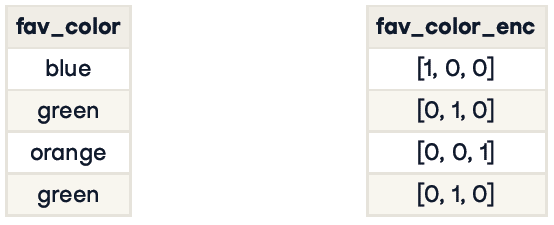

### ***Encoding categorical variables - binary***

Take a look at the `hiking` dataset. There are several columns here that need encoding, one of which is the `Accessible` column, which needs to be encoded in order to be modeled. `Accessible` is a binary feature, so it has two values - either `Y` or `N` - so it needs to be encoded into `1`s and `0`s. Use scikit-learn's **`LabelEncoder`** method to do that transformation.

* Store **`LabelEncoder()`** in a variable named `enc`
* Using the encoder's **`fit_transform()`** function, encode the `hiking` dataset's `"Accessible"` column. Call the new column `Accessible_enc`.

* Compare the two columns side-by-side to see the encoding.

In [4]:
from sklearn.preprocessing import LabelEncoder

hiking = pd.read_json('hiking.json')

# Set up the LabelEncoder object
enc =  LabelEncoder()

# Apply the encoding to the "Accessible" column
hiking['Accessible_enc'] = enc.fit_transform(hiking['Accessible'])

# Compare the two columns
print(hiking[['Accessible', 'Accessible_enc']].head())

  Accessible  Accessible_enc
0          Y               1
1          N               0
2          N               0
3          N               0
4          N               0


**`.fit_transform()`** is a good way to both fit an encoding and transform the data in a single step.

### ***Encoding categorical variables - one-hot***

One of the columns in the volunteer dataset, `category_desc`, gives category descriptions for the volunteer opportunities listed. Because it is a categorical variable with more than two categories, we need to use one-hot encoding to transform this column numerically. Use Pandas' **`get_dummies()`** function to do so.

* Call **`get_dummies()`** on the `volunteer["category_desc"]` column to create the encoded columns and assign it to `category_enc`.

* Print out the `head()` of the `category_enc` variable to take a look at the encoded columns.

In [7]:
volunteer = pd.read_csv('volunteer_opportunities.csv')

# Transform the category_desc column
category_enc = pd.get_dummies(volunteer["category_desc"])
category_enc_2 = pd.get_dummies(volunteer["category_desc"], drop_first=True)
# Take a look at the encoded columns
print(category_enc.head())  
print("\n\n")
print(category_enc_2.head())

   Education  Emergency Preparedness  Environment  Health  \
0          0                       0            0       0   
1          0                       0            0       0   
2          0                       0            0       0   
3          0                       0            0       0   
4          0                       0            1       0   

   Helping Neighbors in Need  Strengthening Communities  
0                          0                          0  
1                          0                          1  
2                          0                          1  
3                          0                          1  
4                          0                          0  



   Emergency Preparedness  Environment  Health  Helping Neighbors in Need  \
0                       0            0       0                          0   
1                       0            0       0                          0   
2                       0            0       0     

**`get_dummies()`** is a simple and quick way to encode categorical variables.

# ***Engineering numerical features - taking an average***

A good use case for taking an aggregate statistic to create a new feature is to take the mean of columns. Here, you have a DataFrame of running times named `running_times_5k`. For each name in the dataset, take the mean of their 5 run times.

* Create a list of the columns you want to take the average of and store it in a variable named `run_columns`.

* Use **`apply`** to take the **`mean()`** of the list of columns and remember to set **`axis=1`**. Use **`lambda row:`** in the **`apply`**.


In [ ]:
# Create a list of the columns to average
run_columns = ['run1',  'run2',  'run3',  'run4',  'run5']

# Use apply to create a mean column
running_times_5k["mean"] = running_times_5k.apply(lambda row: row[run_columns].mean(), axis=1)

# Take a look at the results
print(running_times_5k)



```
          name  run1  run2  run3  run4  run5   mean
    0      Sue  20.1  18.5  19.6  20.3  18.3  19.36
    1     Mark  16.5  17.1  16.9  17.6  17.3  17.08
    2     Sean  23.5  25.1  25.2  24.6  23.9  24.46
    3     Erin  21.7  21.1  20.9  22.1  22.2  21.60
    4    Jenny  25.8  27.1  26.1  26.7  26.9  26.52
    5  Russell  30.9  29.6  31.4  30.4  29.9  30.44
```

Lambdas are especially helpful for operating across columns.

### ***Engineering numerical features - datetime***
There are several columns in the volunteer dataset comprised of datetimes. Let's take a look at the `start_date_date` column and extract just the month to use as a feature for modeling.

* Use Pandas **`to_datetime()`** function on the `volunteer["start_date_date"]` column and store it in a new column called `start_date_converted`.

* To retrieve just the month, apply a **`lambda`** function to `volunteer["start_date_converted"]` that grabs the **`.month`** attribute from the `row`. 

* Store this in a new column called `start_date_month`.

* Print the `head()` of just the `start_date_converted` and `start_date_month` columns.

In [9]:
# First, convert string column to date column
volunteer["start_date_converted"] = pd.to_datetime(volunteer['start_date_date'])

# Extract just the month from the converted column
volunteer["start_date_month"] = volunteer["start_date_converted"].apply(lambda row: row.month)

# Take a look at the converted and new month columns
print(volunteer[['start_date_converted', 'start_date_month']].head())

  start_date_converted  start_date_month
0           2011-07-30                 7
1           2011-02-01                 2
2           2011-01-29                 1
3           2011-02-14                 2
4           2011-02-05                 2


You can also use attributes like `.day` to get the day and `.year` to get the year from datetime columns.

# ***Numeric Extraction***

In [41]:
import re

my_string = "temperature:75.6 F"
pattern = re.compile(r"[^0-9]+(\d+\.\d+)[^0-9]+")
temp = re.match(pattern, my_string)
print(float(temp.group(1)))

75.6


# ***Vectorizing text***

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

print(documents.head())



```
0 Building on successful events last summer and ...
1 Build a website for an Afghan business
2 Please join us and the students from Mott Hall...
3 The Oxfam Action Corps is a group of dedicated...
4 Stop 'N' Swap reduces NYC's waste by finding n...
```



In [ ]:
tfidf_vec = TfidfVectorizer()
text_tfidf = tfidf_vec.fit_transform(documents)

### ***Engineering features from strings - extraction***

The Length column in the `hiking` dataset is a column of strings, but contained in the column is the mileage for the hike. We're going to extract this mileage using regular expressions, and then use a **`lambda`** in Pandas to apply the extraction to the DataFrame.


* Create a pattern that will extract numbers and decimals from text, using **`\d+`** to get numbers and **`\.`** to get decimals, and pass it into `re`'s compile function.

* Use `re`'s match function to search tlhe text, passing in the pattern and the length text.

* Use the matched mile's **`group()`** attribute to extract the matched pattern, making sure to match group `0`, and pass it into float.

* Apply the `return_mileage()` function to the `hiking["Length"]` column.

In [62]:
import re

hiking = pd.read_json('hiking.json').iloc[:29]

# Write a pattern to extract numbers and decimals
def return_mileage(length):
    pattern = re.compile(r"\d+\.\d+")
    
    # Search the text for matches
    mile = re.match(pattern, length)
    
    # If a value is returned, use group(0) to return the found value
    if mile is not None:
        return float(mile.group(0))
        
# Apply the function to the Length column and take a look at both columns
hiking["Length_num"] = hiking["Length"].apply(return_mileage)

#hiking["Length_num"] = hiking["Length"].apply(lambda row: return_mileage(row)) ก็ได้
print(hiking[["Length", "Length_num"]].head())

       Length  Length_num
0   0.8 miles        0.80
1    1.0 mile        1.00
2  0.75 miles        0.75
3   0.5 miles        0.50
4   0.5 miles        0.50


### ***Engineering features from strings - tf/idf***

Let's transform the `volunteer` dataset's title column into a text vector, to use in a prediction task in the next exercise.

* Store the `volunteer["title"]` column in a variable named `title_text`.
* Use the `tfidf_vec` vectorizer's `fit_transform()` function on `title_text` to transform the text into a `tf-idf` vector.

In [63]:
# Take the title text
title_text = volunteer["title"]

# Create the vectorizer method
tfidf_vec = TfidfVectorizer()

# Transform the text into tf-idf vectors
text_tfidf = tfidf_vec.fit_transform(title_text)

Scikit-learn provides several methods for text vectorization.

### ***Text classification using tf/idf vectors***

Now that we've encoded the volunteer dataset's title column into `tf/idf` vectors, let's use those vectors to try to predict the `category_desc` column.

* Using **`train_test_split`**, split the **`text_tfidf`** vector, along with your `y` variable, into training and test sets. Set the **`stratify`** parameter equal to `y`, since the class distribution is uneven. Notice that we have to run the **`toarray()`** method on the tf/idf vector, in order to get in it the proper format for scikit-learn.

* Use Naive Bayes' **`fit()`** method on the `X_train` and `y_train` variables.

* Print out the **`score()`** of the `X_test` and `y_test` variables.

In [69]:
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer

nb = GaussianNB(priors=None)
volunteer = volunteer[["title", 'category_desc']].dropna()
title_text = volunteer["title"]
tfidf_vec = TfidfVectorizer()
text_tfidf = tfidf_vec.fit_transform(title_text)

# Split the dataset according to the class distribution of category_desc
y = volunteer["category_desc"]
X_train, X_test, y_train, y_test = train_test_split(text_tfidf.toarray(), y, stratify=y)

# Fit the model to the training data
nb.fit(X_train, y_train)

# Print out the model's accuracy
print(nb.score(X_test, y_test))

0.5612903225806452


Notice that the model doesn't score very well. We'll work on selecting the best features for modeling.

### ***Selecting relevant features***

Now let's identify the redundant columns in the `volunteer` dataset and perform feature selection on the dataset to return a DataFrame of the relevant features.

For example, if you explore the `volunteer` dataset in the console, you'll see three features which are related to location: `locality`, `region`, and `postalcode`. They contain repeated information, so it would make sense to keep only one of the features.

There are also features that have gone through the feature engineering process: columns like `Education` and `Emergency Preparedness` are a product of encoding the categorical variable `category_desc`, so `category_desc` itself is redundant now.

Take a moment to examine the features of `volunteer` in the console, and try to identify the redundant features.

* Create a list of redundant column names and store it in the `to_drop` variable:

* Out of all the location-related features, keep only `postcode`.

* Features that have gone through the feature engineering process are redundant as well.

* Drop the columns from the dataset using **`.drop()`**.


In [ ]:
volunteer = pd.read_csv('volunteer_opportunities.csv')

# Create a list of redundant column names to drop
to_drop = ["locality", "region", "created_date", "vol_requests", "category_desc"]

# Drop those columns from the dataset
volunteer_subset = volunteer.drop(to_drop, axis=1)

# Print out the head of the new dataset
display(volunteer_subset.head())

It's often easier to collect a list of columns to drop, rather than dropping them individually.

### ***Checking for correlated features***

Let's take a look at the `wine` dataset again, which is made up of continuous, numerical features. Run Pearson's correlation coefficient on the dataset to determine which columns are good candidates for eliminating. Then, remove those columns from the DataFrame.

* Print out the column correlations of the `wine` dataset using **`corr()`**.

* Take a minute to look at the correlations. Identify a column where the correlation value is greater than `0.75` at least twice and store it in the `to_drop` variable.

* Drop that column from the DataFrame using **`drop()`**.

In [ ]:
wine = pd.read_csv('wine_types.csv')
wine.corr()



```
                              Flavanoids  Total phenols  Malic acid  OD280/OD315 of diluted wines       Hue
Flavanoids                      1.000000       0.864564   -0.411007                      0.787194  0.543479
Total phenols                   0.864564       1.000000   -0.335167                      0.699949  0.433681
Malic acid                     -0.411007      -0.335167    1.000000                     -0.368710 -0.561296
OD280/OD315 of diluted wines    0.787194       0.699949   -0.368710                      1.000000  0.565468
Hue                             0.543479       0.433681   -0.561296                      0.565468  1.000000
```



In [ ]:
# Print out the column correlations of the wine dataset
print(wine.corr())

# Take a minute to find the column where the correlation value is greater than 0.75 at least twice
to_drop = "Flavanoids"

# Drop that column from the DataFrame
wine = wine.drop(to_drop, axis=1)



```
                              Total phenols  Malic acid  OD280/OD315 of diluted wines       Hue
Total phenols                      1.000000   -0.335167                      0.699949  0.433681
Malic acid                        -0.335167    1.000000                     -0.368710 -0.561296
OD280/OD315 of diluted wines       0.699949   -0.368710                      1.000000  0.565468
Hue                                0.433681   -0.561296                      0.565468  1.000000
```



Dropping correlated features is often an iterative process, so you may need to try different combinations in your model.

# ***Looking at word weights***

* Use **`.vocabulary_`** attribute

In [22]:
title_text = volunteer["title"]
display(title_text.head())
tfidf_vec = TfidfVectorizer()
text_tfidf = tfidf_vec.fit_transform(title_text)
print(tfidf_vec.vocabulary_)

0    Volunteers Needed For Rise Up & Stay Put! Home...
1                                         Web designer
2        Urban Adventures - Ice Skating at Lasker Rink
3    Fight global hunger and support women farmers ...
4                                        Stop 'N' Swap
Name: title, dtype: object

{'volunteers': 1086, 'needed': 690, 'for': 404, 'rise': 869, 'up': 1061, 'stay': 959, 'put': 822, 'home': 493, 'rescue': 855, 'fair': 375, 'web': 1095, 'designer': 297, 'urban': 1063, 'adventures': 43, 'ice': 515, 'skating': 930, 'at': 98, 'lasker': 587, 'rink': 868, 'fight': 392, 'global': 447, 'hunger': 512, 'and': 75, 'support': 986, 'women': 1108, 'farmers': 380, 'join': 562, 'the': 1012, 'oxfam': 739, 'action': 31, 'corps': 255, 'in': 523, 'nyc': 710, 'stop': 962, 'swap': 989, 'queens': 825, 'staff': 951, 'development': 300, 'trainer': 1037, 'claro': 213, 'brooklyn': 155, 'volunteer': 1084, 'attorney': 101, 'cents': 188, 'ability': 23, 'community': 235, 'health': 480, 'advocates': 48, 'supervise': 984, 'children': 202, 'highland': 491, 'park': 748, 'garden': 433, 'worldofmoney': 1118, 'org': 727, 'youth': 1132, 'amazing': 67, 'race': 826, 'qualified': 824, 'board': 142, 'member': 649, 'seats': 899, 'available': 106, 'young': 1130, 'adult': 38, 'tutor': 1052, 'updated': 1062, '30':

## ***Take a look at the weight of the fourth row.***
* Use **`.data`** attribute.

In [25]:
print(title_text.iloc[3], "\n\n")
print(text_tfidf[3].data) 

Fight global hunger and support women farmers - Join the Oxfam Action Corps in NYC! 


[0.2056446  0.18207404 0.29543299 0.314142   0.314142   0.16847137
 0.25633688 0.314142   0.27186242 0.22435362 0.16380658 0.314142
 0.314142   0.314142  ]


## ***Get the indices of the words that have been weighted***
* Use **`.indices`** attribute

In [14]:
print(text_tfidf[3].indices)

[ 710  523  255   31  739 1012  562  380 1108  986   75  512  447  392]


## ***Change the key-values pairs***

In [18]:
vocab = {v:k for k,v in tfidf_vec.vocabulary_.items()}
print(vocab)

{1086: 'volunteers', 690: 'needed', 404: 'for', 869: 'rise', 1061: 'up', 959: 'stay', 822: 'put', 493: 'home', 855: 'rescue', 375: 'fair', 1095: 'web', 297: 'designer', 1063: 'urban', 43: 'adventures', 515: 'ice', 930: 'skating', 98: 'at', 587: 'lasker', 868: 'rink', 392: 'fight', 447: 'global', 512: 'hunger', 75: 'and', 986: 'support', 1108: 'women', 380: 'farmers', 562: 'join', 1012: 'the', 739: 'oxfam', 31: 'action', 255: 'corps', 523: 'in', 710: 'nyc', 962: 'stop', 989: 'swap', 825: 'queens', 951: 'staff', 300: 'development', 1037: 'trainer', 213: 'claro', 155: 'brooklyn', 1084: 'volunteer', 101: 'attorney', 188: 'cents', 23: 'ability', 235: 'community', 480: 'health', 48: 'advocates', 984: 'supervise', 202: 'children', 491: 'highland', 748: 'park', 433: 'garden', 1118: 'worldofmoney', 727: 'org', 1132: 'youth', 67: 'amazing', 826: 'race', 824: 'qualified', 142: 'board', 649: 'member', 899: 'seats', 106: 'available', 1130: 'young', 38: 'adult', 1052: 'tutor', 1062: 'updated', 13: '

In [19]:
zipped_row = dict(zip(text_tfidf[3].indices, text_tfidf[3].data))
print(zipped_row)

{710: 0.2056446046212042, 523: 0.18207403700074992, 255: 0.295432987618702, 31: 0.31414199966461376, 739: 0.31414199966461376, 1012: 0.16847136678616276, 562: 0.2563368840096324, 380: 0.31414199966461376, 1108: 0.2718624199982478, 986: 0.2243536166671159, 75: 0.16380657953192443, 512: 0.31414199966461376, 447: 0.31414199966461376, 392: 0.31414199966461376}


## ***Define a function to return weights***

In [21]:
def return_weights(vocab, vector, vector_index):
    zipped = dict(zip(vector[vector_index].indices, vector[vector_index].data))
    return {vocab[i]:zipped[i] for i in vector[vector_index].indices}
    
print(return_weights(vocab, text_tfidf, 3))

{'nyc': 0.2056446046212042, 'in': 0.18207403700074992, 'corps': 0.295432987618702, 'action': 0.31414199966461376, 'oxfam': 0.31414199966461376, 'the': 0.16847136678616276, 'join': 0.2563368840096324, 'farmers': 0.31414199966461376, 'women': 0.2718624199982478, 'support': 0.2243536166671159, 'and': 0.16380657953192443, 'hunger': 0.31414199966461376, 'global': 0.31414199966461376, 'fight': 0.31414199966461376}


In [32]:
for i in text_tfidf[3].indices:
    print(vocab[i], end=' ')

nyc in corps action oxfam the join farmers women support and hunger global fight 

### ***Exploring text vectors, part 1***

Let's expand on the text vector exploration method we just learned about, using the `volunteer` dataset's `title` tf/idf vectors. In this first part of text vector exploration, we're going to add to that function we learned about in the slides. We'll return a list of numbers with the function. In the next exercise, we'll write another function to collect the top words across all documents, extract them, and then use that list to filter down our `text_tfidf` vector.

* Add parameters called `original_vocab`, for the **`tfidf_vec.vocabulary_`**, and `top_n`.

* Call **`pd.Series`** on the zipped dictionary. This will make it easier to operate on.

* Use the **`.sort_values`** function to sort the series and slice the index up to `top_n` words.

* Call the function, setting `original_vocab=tfidf_vec.vocabulary_`, setting `vector_index=8` to grab the 9th row, and setting `top_n=3`, to grab the top 3 weighted words.

In [20]:
volunteer = pd.read_csv('volunteer_opportunities.csv')
title_text = volunteer["title"]
tfidf_vec = TfidfVectorizer()
text_tfidf = tfidf_vec.fit_transform(title_text)
vocab = {v:k for k,v in tfidf_vec.vocabulary_.items()}

# Add in the rest of the parameters
def return_weights(vocab, original_vocab, vector, vector_index, top_n):
    zipped = dict(zip(vector[vector_index].indices, vector[vector_index].data))
    print("zipped = \n", zipped, "\n\n")
    # Let's transform that zipped dict into a series
    zipped_series = pd.Series({vocab[i]:zipped[i] for i in vector[vector_index].indices})
    print("zipped_series = \n", zipped_series.head(),"\n\n")
    # Let's sort the series to pull out the top n weighted words
    zipped_index = zipped_series.sort_values(ascending=False)[:top_n].index
    print("zipped_series.sort_values(ascending=False)[:top_n] = \n", zipped_series.sort_values(ascending=False)[:top_n], "\n\n")
    print("zipped_index = \n", zipped_index, "\n\n")
    return [original_vocab[i] for i in zipped_index]

# Print out the weighted words
print(return_weights(vocab, tfidf_vec.vocabulary_, text_tfidf, vector_index=10, top_n=3))

zipped = 
 {433: 0.32882242445111365, 748: 0.2729198250303222, 491: 0.37897391016100135, 202: 0.6758931792190142, 984: 0.4029733541886919, 523: 0.23355993620464943} 


zipped_series = 
 garden       0.328822
park         0.272920
highland     0.378974
children     0.675893
supervise    0.402973
dtype: float64 


zipped_series.sort_values(ascending=False)[:top_n] = 
 children     0.675893
supervise    0.402973
highland     0.378974
dtype: float64 


zipped_index = 
 Index(['children', 'supervise', 'highland'], dtype='object') 


[202, 984, 491]


In [15]:
print(tfidf_vec.vocabulary_['children'])

202


### ***Exploring text vectors, part 2***

Using the function we wrote in the previous exercise, we're going to extract the top words from each document in the text vector, return a list of the word indices, and use that list to filter the text vector down to those top words.

* Call `return_weights` to return the top weighted words for that document.

* Call `set` on the returned `filter_list` so we don't get duplicated numbers.

* Call `words_to_filter`, passing in the following parameters: 
  * `vocab` for the `vocab` parameter, 
  * `tfidf_vec.vocabulary_` for the `original_vocab` parameter, 
  * `text_tfidf` for the vector parameter, and 
  * `3` to grab the `top_n` 3 weighted words from each document.

Finally, pass that `filtered_words` set into a list to use as a filter for the text vector.

In [18]:
volunteer = pd.read_csv('volunteer_opportunities.csv')
title_text = volunteer["title"]
tfidf_vec = TfidfVectorizer()
text_tfidf = tfidf_vec.fit_transform(title_text)
vocab = {v:k for k,v in tfidf_vec.vocabulary_.items()}

def return_weights(vocab, original_vocab, vector, vector_index, top_n):
    zipped = dict(zip(vector[vector_index].indices, vector[vector_index].data))
    zipped_series = pd.Series({vocab[i]:zipped[i] for i in vector[vector_index].indices})
    zipped_index = zipped_series.sort_values(ascending=False)[:top_n].index
    return [original_vocab[i] for i in zipped_index]

def words_to_filter(vocab, original_vocab, vector, top_n):
    filter_list = []
    for i in range(0, vector.shape[0]):
    
        # Here we'll call the function from the previous exercise, and extend the list we're creating
        filtered = return_weights(vocab, original_vocab, vector, i, top_n)
        filter_list.extend(filtered)
    # Return the list in a set, so we don't get duplicate word indices
    return set(filter_list)

# Call the function to get the list of word indices
filtered_words = words_to_filter(vocab, tfidf_vec.vocabulary_, text_tfidf, 3)

# By converting filtered_words back to a list, we can use it to filter the columns in the text vector
filtered_text = text_tfidf[:, list(filtered_words)]
print(filtered_text)

  (0, 344)	0.3163915503784279
  (0, 795)	0.38192461589865456
  (0, 455)	0.3405778550191958
  (0, 764)	0.38192461589865456
  (0, 894)	0.38192461589865456
  (0, 989)	0.25544926998167106
  (0, 372)	0.15529778130809513
  (0, 639)	0.24072387702158726
  (0, 1013)	0.2304728774077965
  (1, 271)	0.6824588570832413
  (1, 1021)	0.7309240099960025
  (2, 807)	0.3903159429478348
  (2, 539)	0.4150336487706769
  (2, 84)	0.2225785986760572
  (2, 866)	0.35917531643639333
  (2, 35)	0.4150336487706769
  (2, 991)	0.4150336487706769
  (3, 657)	0.2056446046212042
  (3, 23)	0.31414199966461376
  (3, 686)	0.31414199966461376
  (3, 944)	0.16847136678616276
  (3, 517)	0.2563368840096324
  (3, 349)	0.31414199966461376
  (3, 1034)	0.2718624199982478
  (3, 920)	0.2243536166671159
  (4, 922)	0.7071067811865475
  (4, 897)	0.7071067811865475


### ***Training Naive Bayes with feature selection***

Let's re-run the Naive Bayes text classification model we ran at the end of chapter 3, with our selection choices from the previous exercise, on the `volunteer` dataset's `title` and `category_desc` columns.

* Use `train_test_split` on the `filtered_text` text vector, the `y` labels (which is the `category_desc` labels), and pass the `y` set to the `stratify` parameter, since we have an uneven class distribution.

* Fit the `nb` Naive Bayes model to `train_X` and `train_y`.

* Score the `nb` model on the `test_X` and `test_y` test sets.

In [24]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB(priors=None)
volunteer = volunteer[["title", 'category_desc']].dropna()
title_text = volunteer["title"]
tfidf_vec = TfidfVectorizer()
text_tfidf = tfidf_vec.fit_transform(title_text)
vocab = {v:k for k,v in tfidf_vec.vocabulary_.items()}
y = volunteer['category_desc']

def return_weights(vocab, original_vocab, vector, vector_index, top_n):
    zipped = dict(zip(vector[vector_index].indices, vector[vector_index].data))
    zipped_series = pd.Series({vocab[i]:zipped[i] for i in vector[vector_index].indices})
    zipped_index = zipped_series.sort_values(ascending=False)[:top_n].index
    return [original_vocab[i] for i in zipped_index]

def words_to_filter(vocab, original_vocab, vector, top_n):
    filter_list = []
    for i in range(0, vector.shape[0]):
    
        # Here we'll call the function from the previous exercise, and extend the list we're creating
        filtered = return_weights(vocab, original_vocab, vector, i, top_n)
        filter_list.extend(filtered)
    # Return the list in a set, so we don't get duplicate word indices
    return set(filter_list)

# Call the function to get the list of word indices
filtered_words = words_to_filter(vocab, tfidf_vec.vocabulary_, text_tfidf, 3)

# By converting filtered_words back to a list, we can use it to filter the columns in the text vector
filtered_text = text_tfidf[:, list(filtered_words)]

###############################################################################

# Split the dataset according to the class distribution of category_desc, using the filtered_text vector
train_X, test_X, train_y, test_y = train_test_split(filtered_text.toarray(), y, stratify=y)

# Fit the model to the training data
nb.fit(train_X, train_y)

# Print out the model's accuracy
print(nb.score(test_X, test_y))

0.5161290322580645


You can see that our accuracy score wasn't that different from the score previously. That's okay; the title field is a very small text field, appropriate for demonstrating how filtering vectors works.

# ***PCA in scikit-learn***

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
df_pca = pca.fit_transform(df)

# ดูว่าตัวแปรใด มีผลต่อความแปรปรวนอย่างไร
print(pca.explained_variance_ratio_)

`[0.9981, 0.0017, 0.0001, 0.0001, ...]`

ความแปรปรวน ส่วนมากถูกอธิบายด้วยตัวแปรที่ 1 ดังนั้น ตัวแปรอื่นๆ อาจจะตัดออกไปได้

### ***Using PCA***

Let's apply PCA to the `wine` dataset, to see if we can get an increase in our model's accuracy.

* Set up the **`PCA`** object. You'll use **`PCA`** on the `wine` dataset minus its label for `Type`, stored in the variable `wine_X`.

* Apply **`PCA`** to `wine_X` using **`pca`**'s **`.fit_transform`** method and store the transformed vector in `transformed_X`.

* Print out the `explained_variance_ratio_` attribute of `pca` to check how much variance is explained by each component.

In [2]:
from sklearn.decomposition import PCA

wine = pd.read_csv('wine_types.csv')

# Set up PCA and the X vector for diminsionality reduction
pca = PCA()
wine_X = wine.drop("Type", axis=1)

# Apply PCA to the wine dataset X vector
transformed_X = pca.fit_transform(wine_X)

# Look at the percentage of variance explained by the different components
print(pca.explained_variance_ratio_)

[9.98091230e-01 1.73591562e-03 9.49589576e-05 5.02173562e-05
 1.23636847e-05 8.46213034e-06 2.80681456e-06 1.52308053e-06
 1.12783044e-06 7.21415811e-07 3.78060267e-07 2.12013755e-07
 8.25392788e-08]


### ***Training a model with PCA***

Now that we have run **`PCA`** on the `wine` dataset, let's try training a model with it.

* Split the `transformed_X` vector and the `y` labels set into training and test sets using **`train_test_split`**.

* Fit the **`knn`** model using the **`.fit()`** function on the `X_wine_train` and `y_wine_train` sets.

* Print out the score using **`knn`**'s **`.score()`** function on `X_wine_test` and `y_wine_test`.

In [10]:
knn = KNeighborsClassifier(n_neighbors=4)
y = wine['Type']

# Split the transformed X and the y labels into training and test sets
X_wine_train, X_wine_test, y_wine_train, y_wine_test = train_test_split(transformed_X, y)

# Fit knn to the training data
knn.fit(X_wine_train, y_wine_train)

# Score knn on the test data and print it out
knn.score(X_wine_test, y_wine_test)

0.6444444444444445

### ***Checking column types***

Take a look at the UFO dataset's column types using the **`dtypes`** attribute. 
Two columns jump out for transformation: the `seconds` column, which is a numeric column but is being read in as object, and the `date` column, which can be transformed into the **`datetime`** type. That will make our feature engineering efforts easier later on.

* Print out the **`dtypes`** of the `ufo` dataset.

* Change the type of the `seconds` column by passing the **`float`** type into the **`.astype()`** method.

* Change the type of the `date` column by passing `ufo["date"]` into the **`pd.to_datetime()`** function.

* Print out the **`dtypes`** of the seconds and `date` columns, to make sure it worked.

In [13]:
ufo = pd.read_csv('ufo_sightings_large.csv')

# Check the column types
print(ufo.dtypes)

# Change the type of seconds to float
ufo["seconds"] = ufo["seconds"].astype(float)

# Change the date column to type datetime
ufo["date"] = pd.to_datetime(ufo["date"])

# Check the column types
print(ufo[['seconds', 'date']].dtypes)

date               object
city               object
state              object
country            object
type               object
seconds           float64
length_of_time     object
desc               object
recorded           object
lat                object
long              float64
dtype: object
seconds           float64
date       datetime64[ns]
dtype: object


### ***Dropping missing data***

Let's remove some of the rows where certain columns have missing values. We're going to look at the `length_of_time` column, the `state` column, and the `type` column. If any of the values in these columns are missing, we're going to drop the rows.

* Check how many values are missing in the `length_of_time`, `state`, and `type` columns, using **`.isnull()`** to check for nulls and **`.sum()`** to calculate how many exist.

* Use boolean indexing to filter out the rows with those missing values, using **`.notnull()`** to check the column. Here, we can chain together each column we want to check.

* Print out the **`shape`** of the new `ufo_no_missing` dataset.

In [15]:
ufo = pd.read_csv('ufo_sightings_large.csv')[['date', 'state', 'type', 'length_of_time']]

# Check how many values are missing in the length_of_time, state, and type columns
print(ufo[['length_of_time', 'state', 'type']].isnull().sum())

# Keep only rows where length_of_time, state, and type are not null
ufo_no_missing = ufo[ufo['length_of_time'].notnull() & ufo['state'].notnull() & ufo['type'].notnull()]

# Print out the shape of the new dataset
print(ufo_no_missing.shape)

# ใช้ ufo.dropna().shape ง่ายกว่า

length_of_time    143
state             419
type              159
dtype: int64
(4283, 4)


### ***Extracting numbers from strings***

The `length_of_time` field in the UFO dataset is a text field that has the number of minutes within the string. Here, you'll extract that number from that text field using regular expressions.

* Pass `\d+` into **`re.compile()`** in the `pattern` variable to designate that we want to grab as many digits as possible from the string.

* Into **`re.match()`**, pass the `pattern` we just created, as well as the `time_string` we want to extract from.

* Use **`lambda`** within the **`.apply()`** method to perform the extraction.

* Print out the **`.head()`** of both the `length_of_time` and minutes columns to compare.

In [24]:
ufo = pd.read_csv('ufo_sightings_large.csv').dropna()
ufo = ufo[ufo["length_of_time"].str.contains('minutes')]

def return_minutes(time_string):

    # Use \d+ to grab digits
    pattern = re.compile(r"\d+")
    
    # Use match on the pattern and column
    num = re.match(pattern, time_string)
    if num is not None:
        return int(num.group(0))
        
# Apply the extraction to the length_of_time column
ufo["minutes"] = ufo["length_of_time"].apply(return_minutes)

# Take a look at the head of both of the columns
print(ufo[["length_of_time", "minutes"]].head())

     length_of_time  minutes
3   about 5 minutes      NaN
5        10 minutes     10.0
8         2 minutes      2.0
9         2 minutes      2.0
10        5 minutes      5.0


As you can see, we end up with some `NaN`s in the DataFrame. That's okay for now; we'll take care of those before modeling.

### ***Identifying features for standardization***

In this section, you'll investigate the variance of columns in the UFO dataset to determine which features should be standardized. After taking a look at the variances of the `seconds` and `minutes` column, you'll see that the variance of the `seconds` column is extremely high. Because `seconds` and `minutes` are related to each other (an issue we'll deal with when we select features for modeling), let's log normlize the `seconds` column.

* Use the **`.var()`** method on the `seconds` and `minutes` columns to check the variance. Notice how high the variance is on the `seconds` column.

* Using **`np.log()`** to perform log normalization on the `seconds` column, transforming it into a new column named `seconds_log`.

* Print out the variance of the `seconds_log` column.

In [25]:
# Check the variance of the seconds and minutes columns
print(ufo[['seconds', 'minutes']].var())

# Log normalize the seconds column
ufo["seconds_log"] = np.log(ufo['seconds'])

# Print out the variance of just the seconds_log column
print(ufo["seconds_log"].var())

seconds    433229.169958
minutes       119.159917
dtype: float64
0.8391915489580166


### ***Encoding categorical variables***

There are couple of columns in the UFO dataset that need to be encoded before they can be modeled through scikit-learn. You'll do that transformation here, using both binary and one-hot encoding methods.

* Using **`.apply()`**, write a **`lambda`** that returns a `1` if the value is `us`, else return `0`. 

* Next, print out the number of **`unique()`** values of the `type` column.

* Using **`pd.get_dummies()`**, create a one-hot encoded set of the `type` column.

* Finally, use **`pd.concat()`** to concatenate the `ufo` dataset to the `type_set` encoded variables.

In [7]:
ufo = pd.read_csv('ufo_sightings_large.csv')

# Use Pandas to encode us values as 1 and others as 0
ufo["country_enc"] = ufo["country"].apply(lambda x: 1 if x == 'us' else 0)

# Print the number of unique type values
print(len(ufo['type'].unique()))

# Create a one-hot encoded set of the type values
type_set = pd.get_dummies(ufo['type'])

# Concatenate this set back to the ufo DataFrame
ufo = pd.concat([ufo, type_set], axis=1)

22


### ***Features from dates***

Another feature engineering task to perform is month and year extraction. Perform this task on the date column of the `ufo` dataset.

* Print out the **`.head()`** of the `date` column.

* Using **`.apply()`**, **`lambda`**, and the **`.month`** attribute, extract the month from the `date` column.

* Using **`apply()`**, **`lambda`**, and the **`.year`** attribute, extract the year from the `date` column.

* Take a look at the **`.head()`** of the `date`, `month`, and `year` columns.

In [9]:
ufo['date'] = pd.to_datetime(ufo['date'])

# Look at the first 5 rows of the date column
print(ufo['date'].head())

# Extract the month from the date column
ufo["month"] = ufo["date"].apply(lambda x: x.month)

# Extract the year from the date column
ufo["year"] = ufo["date"].apply(lambda x: x.year)

# Take a look at the head of all three columns
print(ufo[['date', 'month', 'year']].head())

0   2011-11-03 19:21:00
1   2004-10-03 19:05:00
2   2009-09-25 21:00:00
3   2002-11-21 05:45:00
4   2010-08-19 12:55:00
Name: date, dtype: datetime64[ns]
                 date  month  year
0 2011-11-03 19:21:00     11  2011
1 2004-10-03 19:05:00     10  2004
2 2009-09-25 21:00:00      9  2009
3 2002-11-21 05:45:00     11  2002
4 2010-08-19 12:55:00      8  2010


` 'apply'` and `'lambda'` are extremely useful for extraction tasks.

### ***Text vectorization***

Let's transform the `desc` column in the UFO dataset into tf/idf vectors, since there's likely something we can learn from this field.

* Print out the **`.head()`** of the `ufo["desc"]` column.

* Set `vec` equal to the **`TfidfVectorizer()`** object.

* Use `vec`'s **`.fit_transform()`** method on the `ufo["desc"]` column.

* Print out the **`shape`** of the `desc_tfidf` vector, to take a look at the number of columns this created. The output is in the shape (rows, columns).

In [63]:
a = ufo['desc'].drop([2650, 3856, 4538])

# Take a look at the head of the desc field
print(a.head())

# Create the tfidf vectorizer object
vec = TfidfVectorizer()

# Use vec's fit_transform method on the desc field
desc_tfidf = vec.fit_transform(a)

# Look at the number of columns this creates
print(desc_tfidf.shape)

0    Red blinking objects similar to airplanes or s...
1                 Many fighter jets flying towards UFO
2    Green&#44 red&#44 and blue pulses of light tha...
3    It was a large&#44 triangular shaped flying ob...
4       A white spinning disc in the shape of an oval.
Name: desc, dtype: object
(4932, 6433)


The text vector has a large number of columns.

### ***Selecting the ideal dataset***

Let's get rid of some of the unnecessary features. Because we have an encoded country column, `country_enc`, keep it and drop other columns related to location: `city`, `country`, `lat`, `long`, `state`.

We have columns related to month and year, so we don't need the `date` or `recorded` columns.

* We vectorized `desc`, so we don't need it anymore. For now we'll keep `type`.

* We'll keep `seconds_log` and drop `seconds` and `minutes`.

* Let's also get rid of the `length_of_time` column, which is unnecessary after extracting minutes.

* Use **`.corr()`** to run the correlation on` seconds`, `seconds_log`, and `minutes` in the `ufo` DataFrame.

* Make a list of columns to drop, in alphabetical order.

* Use **`.drop()`** to drop the columns.

* Use the `words_to_filter()` function we created previously. Pass in `vocab`, `vec.vocabulary_`, `desc_tfidf`, and let's keep the top `4` words as the last parameter.

In [ ]:
def words_to_filter(vocab, original_vocab, vector, top_n):
    filter_list = []
    
    for i in range(0, vector.shape[0]):
        filtered = return_weights(vocab, original_vocab, vector, i, top_n)
        filter_list.extend(filtered)
        
    return set(filter_list)

# Check the correlation between the seconds, seconds_log, and minutes columns
print(ufo[['seconds', 'seconds_log', 'minutes']].corr())

# Make a list of features to drop
to_drop = ['city', 'country', 'date', 'desc','lat', 'length_of_time', 'long', 'minutes', 'recorded', 'seconds', 'state']

# Drop those features
ufo_dropped = ufo.drop(to_drop, axis=1)

# Let's also filter some words out of the text vector we created
filtered_words = words_to_filter(vocab, vec.vocabulary_, desc_tfidf, 4)

### ***Modeling the UFO dataset, part 1***

In this exercise, we're going to build a k-nearest neighbor model to predict which country the UFO sighting took place in. Our `X` dataset has the log-normalized seconds column, the one-hot encoded type columns, as well as the month and year when the sighting took place. The `y` labels are the encoded country column, where `1` is `us` and `0` is `ca`.

* Print out the **`.columns`** of the `X` set.

* Split up the `X` and `y` sets using **`train_test_split()`**. Pass the `y` set to the **`stratify=`** parameter, since we have imbalanced classes here.

* Use **`.fit()`** to fit `train_X` and `train_y`.

* Print out the **`.score()`** of the `knn` model on the `test_X` and `test_y` sets.

In [ ]:
# Take a look at the features in the X set of data
print(X.columns)

# Split the X and y sets using train_test_split, setting stratify=y
train_X, test_X, train_y, test_y = train_test_split(X, y, stratify=y)

# Fit knn to the training sets
knn.fit(train_X, train_y)

# Print the score of knn on the test sets
print(knn.score(test_X, test_y))



```
Index(['seconds_log', 'changing', 'chevron', 'cigar', 'circle', 'cone',
           'cross', 'cylinder', 'diamond', 'disk', 'egg', 'fireball', 'flash',
           'formation', 'light', 'other', 'oval', 'rectangle', 'sphere',
           'teardrop', 'triangle', 'unknown', 'month', 'year'],
          dtype='object')
    0.8693790149892934
```
This model performs pretty well. It seems like we've made pretty good feature selection choices here.

### ***Modeling the UFO dataset, part 2***

Finally, let's build a model using the text vector we created, `desc_tfidf`, using the `filtered_words` list to create a filtered text vector. Let's see if we can predict the type of the sighting based on the text. We'll use a Naive Bayes model for this.

* On the `desc_tfidf` vector, filter by passing a list of `filtered_words` into the index.

* Split up the `X` and `y` sets using `train_test_split()`. Remember to convert `filtered_text` using **`toarray()`**. Pass the `y` set to the **`stratify=`** parameter, since we have imbalanced classes here.

* Use the `nb` model's `fit()` to fit `train_X` and `train_y`.

* Print out the **`.score()`** of the `nb` model on the `test_X` and `test_y` sets.


In [ ]:
# Use the list of filtered words we created to filter the text vector
filtered_text = desc_tfidf[:, list(filtered_words)]

# Split the X and y sets using train_test_split, setting stratify=y 
train_X, test_X, train_y, test_y = train_test_split(filtered_text.toarray(), y, stratify=y)

# Fit nb to the training sets
nb.fit(train_X, train_y)

# Print the score of nb on the test sets
print(nb.score(test_X, test_y))



```
0.16274089935760172
```

This model performs very poorly on this text data. This is a clear case where iteration would be necessary to figure out what subset of text improves the model, and if perhaps any of the other features are useful in predicting type.

